In [50]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# New Section

In [13]:

import tensorflow as tf

import random
import numpy as np
import pandas as pd

import scipy.io
import cv2
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from skimage.transform import resize



In [14]:
train=pd.read_csv("/content/gdrive/My Drive/train.csv")

In [15]:
train.head

<bound method NDFrame.head of      image_names  emergency_or_not
0       1503.jpg                 0
1       1420.jpg                 0
2       1764.jpg                 0
3       1356.jpg                 0
4       1117.jpg                 0
...          ...               ...
1641    1638.jpg                 0
1642    1095.jpg                 0
1643    1130.jpg                 0
1644    1294.jpg                 0
1645     860.jpg                 1

[1646 rows x 2 columns]>

In [16]:
test=pd.read_csv("/content/gdrive/My Drive/test_vc2kHdQ (1).csv")

In [17]:
l=[]
for i in train['image_names']:
    a=i
    sp=i.split(".")
    l.append(sp[0])
li=[]
for i in l:
    i=int(i)
    li.append(i)

In [18]:
from tqdm import tqdm
tt=[]
for i in tqdm(li):
    img = image.load_img('/content/gdrive/My Drive/CVhack/images/'+str(i)+'.jpg',target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    tt.append(img)

100%|██████████| 1646/1646 [18:27<00:00,  1.49it/s]


In [19]:
X = np.array(tt)
X.shape

(1646, 224, 224, 3)

In [ ]:
from tqdm import tqdm
import os
tt=[]
for i in tqdm(li):
    img = image.load_img('/content/gdrive/My Drive/images/'+str(i)+'.jpg',target_size=(224,224,3))
    img = image.img_to_array(img)
    filename =str(i)+'.jpg'
    dirt='/content/gdrive/My Drive/images_train'
    img.astype(np.float32)
    os.chdir(dirt)
    cv2.imwrite(filename,img)

    

In [22]:
y=np.array(train['emergency_or_not'])

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.1)

In [24]:
X_train.shape

(1481, 224, 224, 3)

In [25]:
X_val.shape

(165, 224, 224, 3)

In [26]:
l2=[]
for i in test['image_names']:
    a=i
    sp=i.split(".")
    l2.append(sp[0])
li2=[]
for i in l2:
    i=int(i)
    li2.append(i)

In [33]:
test.head()

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


In [34]:
from tqdm import tqdm
tt2=[]
for i in tqdm(li2):
    img = image.load_img('/content/gdrive/My Drive/CVhack/images/'+str(i)+'.jpg',target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    tt2.append(img)

100%|██████████| 706/706 [08:00<00:00,  1.47it/s]


In [35]:
X_test=np.array(tt2)
X_test.shape

(706, 224, 224, 3)

In [36]:
!pip install efficientnet

In [37]:
import efficientnet.tfkeras as efn
from tensorflow.keras import layers as L


In [38]:

x = tf.keras.Input(shape=(128,128,3))
backbone='efficientnet-b3'
if backbone.startswith('efficientnet'):
  model_fn = getattr(efn, f'EfficientNetB{backbone[-1]}')
y = model_fn(input_shape=(128,128,3), weights='imagenet', include_top=False)(x)
y = L.GlobalAveragePooling2D()(y)
y = L.Dropout(0.2)(y)
y = L.Dense(1, activation='sigmoid')(y)
model1 = tf.keras.Model(x,y)

44113920/44107200 [==============================] - 5s 0us/step


In [39]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.1,
                                         patience=4,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

from tensorflow.keras import layers as L

In [41]:
model1.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [42]:
X_train_resize=[]
for i in tqdm(X_train):
  resiz= resize(i, (128, 128), anti_aliasing=True)
  X_train_resize.append(resiz)

100%|██████████| 1481/1481 [00:09<00:00, 157.41it/s]


In [43]:
X_trainrr=np.array(X_train_resize)

In [44]:
X_val_resize=[]
for i in tqdm(X_val):
  resiz= resize(i, (128, 128), anti_aliasing=True)
  X_val_resize.append(resiz)

100%|██████████| 165/165 [00:01<00:00, 164.96it/s]


In [45]:
X_valrr=np.array(X_val_resize)

In [46]:
model1.fit(X_trainrr, y_train, epochs=25, validation_data=(X_valrr, y_val),batch_size=16, callbacks=[reduce_learning_rate])

Epoch 1/25
93/93 [==============================] - 17s 187ms/step - loss: 0.4164 - accuracy: 0.8238 - val_loss: 0.3335 - val_accuracy: 0.8970 - lr: 0.0010
Epoch 2/25
93/93 [==============================] - 14s 155ms/step - loss: 0.1974 - accuracy: 0.9196 - val_loss: 0.2314 - val_accuracy: 0.9394 - lr: 0.0010
Epoch 3/25
93/93 [==============================] - 14s 154ms/step - loss: 0.1610 - accuracy: 0.9433 - val_loss: 0.3822 - val_accuracy: 0.8788 - lr: 0.0010
Epoch 4/25
93/93 [==============================] - 14s 156ms/step - loss: 0.1029 - accuracy: 0.9662 - val_loss: 0.6156 - val_accuracy: 0.9152 - lr: 0.0010
Epoch 5/25
93/93 [==============================] - 14s 156ms/step - loss: 0.1057 - accuracy: 0.9656 - val_loss: 0.1929 - val_accuracy: 0.9273 - lr: 0.0010
Epoch 6/25
93/93 [==============================] - 14s 155ms/step - loss: 0.0400 - accuracy: 0.9858 - val_loss: 0.2509 - val_accuracy: 0.9273 - lr: 0.0010
Epoch 7/25
93/93 [==============================] - 14s 156ms/st

In [47]:
tes=[]
for i in tqdm(X_test):
  resiz= resize(i, (128, 128), anti_aliasing=True)
  tes.append(resiz)

100%|██████████| 706/706 [00:04<00:00, 162.93it/s]


In [48]:
X_test_resize=np.array(tes)

In [49]:
X_test_resize.shape

(706, 128, 128, 3)

In [50]:
model1.save_weights('/content/gdrive/My Drive/effi_model_b3epoch100.h5')

In [51]:
result_val_eff=model1.predict(X_valrr)
result_test_eff=model1.predict(X_test_resize)

In [52]:
val_res_eff=[]
for i in range(X_valrr.shape[0]):
  if result_val_eff[i, 0] >= 0.5:
    val_res_eff.append(1)
  else:
    val_res_eff.append(0)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(val_res_eff,y_val)

0.9333333333333333

In [54]:
test_res_eff=[]
for i in range(X_test_resize.shape[0]):
  if result_test_eff[i, 0] >= 0.5:
    test_res_eff.append(1)
  else:
    test_res_eff.append(0)

In [55]:
len(test)

706

In [56]:
test['emergency_or_not'] = test_res_eff

In [57]:
test.head()

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,1
4,1907.jpg,0


In [58]:
test.to_csv('/content/gdrive/My Drive/hackathon_res3.csv')

In [59]:
#test_res=[]
#for i in range(test.shape[0]):
 #   if resulttest[i, 0] >= 0.5: 
        #print('I am {:.2%} sure this is a emergnecy'.format(resulttest[i][0]))
#        test_res.append(1)
 #   else: 
        #print('I am {:.2%} sure this is a non'.format(1-resulttest[i][0]))
 #       test_res.append(0)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, val_res_eff)

array([[98,  4],
       [ 7, 56]])

In [60]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
!pip install https://github.com/fastai/fastai/archive/1.0.49.zip


  Using cached https://github.com/fastai/fastai/archive/1.0.49.zip
  Created wheel for fastai: filename=fastai-1.0.49-cp36-none-any.whl size=209560 sha256=0c0a0b6e6e3de6ad88cf7a7d79ec859fd82276ca55d658ed43ee82042d96cb7a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ouuechr3/wheels/1e/50/f4/007e761a28dd5b03ad92df65bbef5a8a84b799052298cb44a0
Successfully built fastai


In [1]:
!pip install --upgrade fastai


Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.61)


In [3]:
from fastai.vision import *
from fastai.callbacks import *

In [4]:
path = Path("/content/gdrive/My Drive/CVhack")
path


PosixPath('/content/gdrive/My Drive/CVhack')

In [10]:
np.random.seed(42)
data=ImageDataBunch.from_csv(path=path, folder='images_train', csv_labels='train.csv', valid_pct=0.2, test='images_test',ds_tfms=get_transforms(), size=128, bs=128).normalize(imagenet_stats)

In [11]:
data

ImageDataBunch;

Train: LabelList (1317 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0,0,0,0,0
Path: /content/gdrive/My Drive/CVhack;

Valid: LabelList (329 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,0,0,0,0
Path: /content/gdrive/My Drive/CVhack;

Test: LabelList (706 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/CVhack

In [12]:
get_transforms()

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do

In [13]:
len(data.classes),data.c
print(data.classes)

[0, 1]


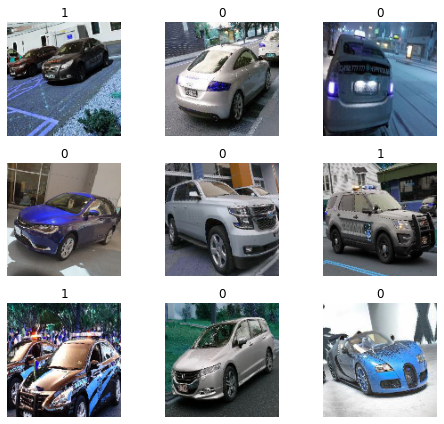

In [14]:
data.show_batch(rows=3, figsize=(7,6))

First Model using Fastai

In [15]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [16]:
learn.fit_one_cycle(10)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.134493,0.698241,0.231003,0.768997,03:34
1,0.893165,0.556116,0.151976,0.848024,00:10
2,0.751968,0.496085,0.148936,0.851064,00:08
3,0.655026,0.450826,0.151976,0.848024,00:07
4,0.575839,0.383378,0.139818,0.860182,00:08
5,0.517107,0.358472,0.136778,0.863222,00:08
6,0.463391,0.356394,0.133739,0.866261,00:08
7,0.430909,0.342636,0.136778,0.863222,00:08
8,0.395049,0.343137,0.136778,0.863222,00:08
9,0.368392,0.340091,0.136778,0.863222,00:08


In [17]:
#learn.save('stage-1')

In [18]:
from fastai import *
from fastai.vision import *


In [19]:
learn.load('stage-1')
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

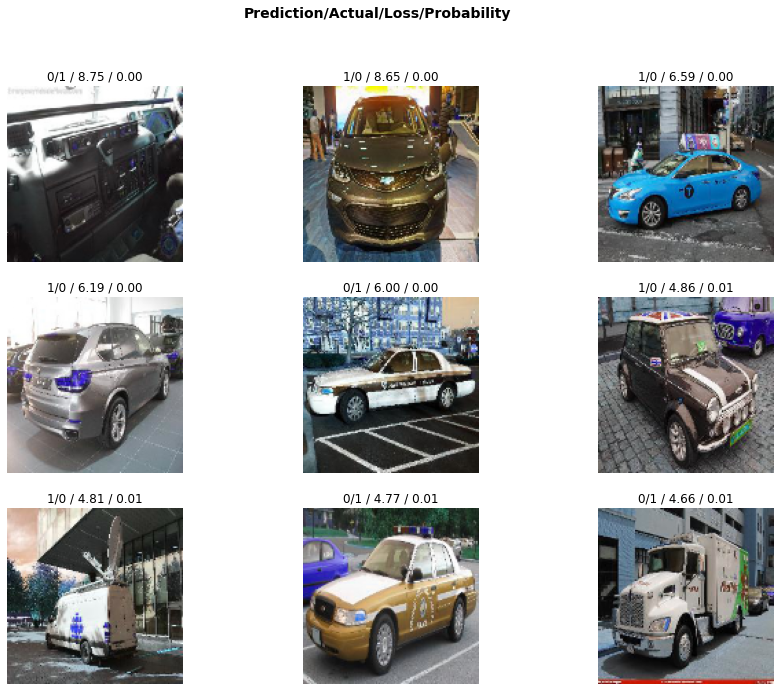

In [20]:
interp.plot_top_losses(9, figsize=(15,11))


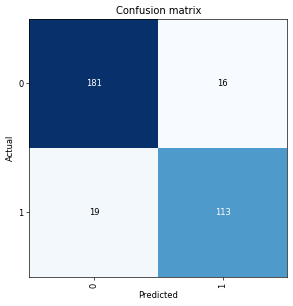

In [21]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)


In [22]:
learn.unfreeze()

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:

learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.481570,0.378011,0.100304,0.899696,00:08


In [25]:
learn.load('stage-1');


In [26]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


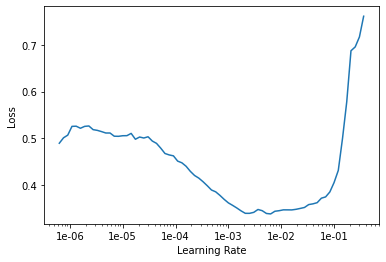

In [27]:
learn.recorder.plot()


In [28]:
#learn.load('stage-1');
learn.unfreeze()
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.488573,0.315142,0.097264,0.902736,00:08
1,0.383932,0.280307,0.091185,0.908815,00:08
2,0.290912,0.232065,0.069909,0.930091,00:08
3,0.228040,0.193671,0.069909,0.930091,00:08
4,0.195335,0.312153,0.069909,0.930091,00:08
5,0.160521,0.341066,0.075988,0.924012,00:08
6,0.136991,0.353974,0.091185,0.908815,00:08
7,0.118679,0.377109,0.091185,0.908815,00:08
8,0.104259,0.364180,0.075988,0.924012,00:08
9,0.086295,0.249161,0.072948,0.927052,00:08


In [29]:
#learn.load('stage-1');
learn.unfreeze()
learn.fit_one_cycle(15, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.482226,0.309985,0.094225,0.905775,00:08
1,0.422123,0.285662,0.100304,0.899696,00:08
2,0.356995,0.266629,0.085106,0.914894,00:08
3,0.294525,0.215760,0.079027,0.920973,00:08
4,0.246553,0.199564,0.094225,0.905775,00:08
5,0.212609,0.207255,0.075988,0.924012,00:08
6,0.182923,0.224833,0.085106,0.914894,00:08
7,0.159350,0.274534,0.088146,0.911854,00:08
8,0.134471,0.272640,0.094225,0.905775,00:08
9,0.115056,0.233944,0.069909,0.930091,00:08


In [30]:
learn.lr_find()


epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [32]:
#learn.load('stage-1');
learn.unfreeze()
learn.fit_one_cycle(15, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.028495,0.215088,0.060790,0.939210,00:08
1,0.024882,0.219673,0.066869,0.933131,00:08
2,0.023679,0.204057,0.060790,0.939210,00:08
3,0.022858,0.213673,0.066869,0.933131,00:08
4,0.021938,0.248005,0.072948,0.927052,00:08
5,0.023371,0.204793,0.057751,0.942249,00:08
6,0.022092,0.203417,0.063830,0.936170,00:08
7,0.020727,0.220001,0.063830,0.936170,00:08
8,0.020241,0.207676,0.069909,0.930091,00:08
9,0.018998,0.209868,0.063830,0.936170,00:08


In [35]:
#learn.save('stage-2')


In [36]:
test=pd.read_csv("/content/gdrive/My Drive/test_vc2kHdQ (1).csv")

In [37]:
l=[]
for i in test['image_names']:
    a=i
    sp=i.split(".")
    l.append(sp[0])
li=[]
for i in l:
    i=int(i)
    li.append(i)

In [38]:
len(li)

706

In [39]:
#from tqdm import tqdm
#import os

#for i in tqdm(li):
#    img = image.load_img('/content/drive/My Drive/images/'+str(i)+'.jpg',target_size=(224,224,3))
#    img = image.img_to_array(img)
#    filename =str(i)+'.jpg'
#    dirt='/content/drive/My Drive/images_test'
#    img.astype(np.float32)
#    os.chdir(dirt)
#    cv2.imwrite(filename,img)

    

In [43]:
predictions, *_ = learn.get_preds(ds_type=DatasetType.Test)

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fc9a2089240>>
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fc9a2089240>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
Traceback (most recent call last):
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    assert self._parent_pid == 

In [44]:
preds = np.argmax(predictions, 1)
preds

tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,

In [45]:

pred_arr=a = np.array(preds)
len(pred_arr)

706

In [46]:
test.shape

(706, 1)

In [47]:
test['emergency_or_not'] = pred_arr
test.to_csv('/content/drive/My Drive/CV_Hack4.csv')

In [51]:
#Using VGG-16 as it is trained with cars images
learn2 = create_cnn(data, models.vgg16_bn, metrics=[error_rate, accuracy])

In [52]:
learn2.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.997608,0.455665,0.209726,0.790274,00:13
1,0.737872,0.376708,0.136778,0.863222,00:09
2,0.606971,0.408070,0.124620,0.875380,00:10
3,0.523490,0.368800,0.133739,0.866261,00:09
4,0.451787,0.346976,0.112462,0.887538,00:10
5,0.402152,0.380297,0.142857,0.857143,00:10
6,0.358881,0.325203,0.121581,0.878419,00:10
7,0.323978,0.278757,0.121581,0.878419,00:10
8,0.287668,0.272799,0.103343,0.896657,00:10
9,0.262742,0.291304,0.115502,0.884498,00:09


In [53]:
#learn2.save('vgg16-1')

In [54]:
learn2.unfreeze()

In [55]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fc9d09f76a0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


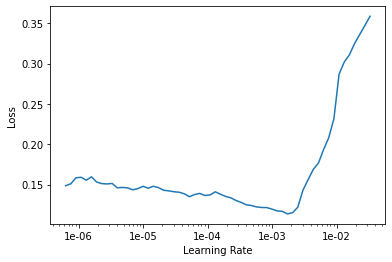

In [56]:
learn2.recorder.plot()


In [57]:
learn2.unfreeze()
learn2.fit_one_cycle(15, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.134880,0.268702,0.112462,0.887538,00:11
1,0.134699,0.255575,0.100304,0.899696,00:11
2,0.129941,0.241920,0.103343,0.896657,00:10
3,0.118140,0.258046,0.094225,0.905775,00:11
4,0.103092,0.230045,0.072948,0.927052,00:11
5,0.093572,0.239779,0.066869,0.933131,00:11
6,0.080144,0.268525,0.069909,0.930091,00:10
7,0.070436,0.275158,0.082067,0.917933,00:10
8,0.062482,0.244764,0.066869,0.933131,00:11
9,0.055873,0.263933,0.072948,0.927052,00:11


In [58]:


#learn2.save('vgg16-1')

In [59]:
#learn2.load('vgg16-1')
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


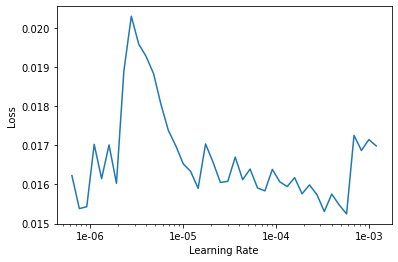

In [60]:
learn2.recorder.plot()

In [61]:
learn2.unfreeze()
learn2.fit_one_cycle(15, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.017060,0.224824,0.075988,0.924012,00:11
1,0.019206,0.276942,0.082067,0.917933,00:11
2,0.021105,0.366058,0.094225,0.905775,00:11
3,0.035393,0.566739,0.142857,0.857143,00:10
4,0.045127,0.339314,0.066869,0.933131,00:11
5,0.052578,0.516850,0.079027,0.920973,00:11
6,0.051054,0.316962,0.069909,0.930091,00:11
7,0.053516,0.260317,0.069909,0.930091,00:10
8,0.049481,0.238384,0.066869,0.933131,00:10
9,0.043911,0.283901,0.075988,0.924012,00:11


In [62]:
predictions, *_ = learn2.get_preds(ds_type=DatasetType.Test)
preds = np.argmax(predictions, 1)
preds
pred_arr2=a = np.array(preds)
len(pred_arr2)


706

In [63]:
test['emergency_or_not'] = pred_arr2
test.to_csv('/content/gdrive/My Drive/CV_Hack5.csv')

In [64]:
np.random.seed(42)
data64bc = ImageDataBunch.from_csv(path=path, folder='images_train', csv_labels='train.csv', valid_pct=0.2, test='images_test',ds_tfms=get_transforms(), size=128, bs=64).normalize(imagenet_stats)

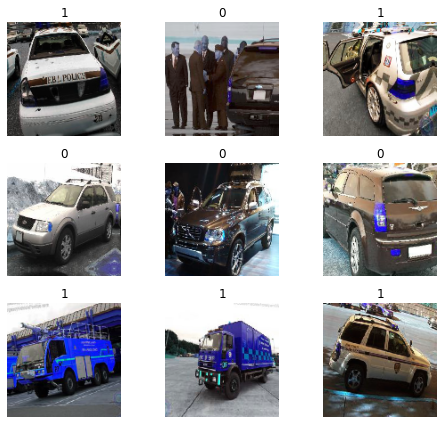

In [65]:
data64bc.show_batch(rows=3, figsize=(7,6))

In [66]:
learnbc64=create_cnn(data64bc, models.vgg16_bn, metrics=[error_rate, accuracy])

In [67]:
learnbc64.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.904593,0.430755,0.176292,0.823708,00:12
1,0.681859,0.418833,0.124620,0.875380,00:09
2,0.530592,0.443668,0.121581,0.878419,00:09
3,0.457400,0.378500,0.118541,0.881459,00:09
4,0.384605,0.326194,0.124620,0.875380,00:09
5,0.328782,0.307580,0.124620,0.875380,00:09
6,0.283421,0.305770,0.130699,0.869301,00:09
7,0.246036,0.290362,0.115502,0.884498,00:09
8,0.222644,0.279981,0.109422,0.890577,00:09
9,0.206788,0.279856,0.109422,0.890577,00:09


In [68]:
learnbc64.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


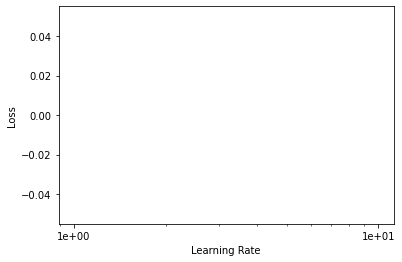

In [69]:
learnbc64.recorder.plot()

In [70]:
learnbc64.unfreeze()
learnbc64.fit_one_cycle(15, max_lr=slice(1e-03,1e-02))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.202807,0.396965,0.103343,0.896657,00:11
1,0.211042,0.589675,0.106383,0.893617,00:10
2,0.201646,0.780060,0.136778,0.863222,00:10
3,0.234128,0.636582,0.243161,0.756839,00:11
4,0.254579,1.264713,0.185410,0.814590,00:10
5,0.261298,0.226713,0.088146,0.911854,00:11
6,0.232801,0.674332,0.203647,0.796353,00:10
7,0.219893,0.169403,0.069909,0.930091,00:11
8,0.194634,0.417034,0.106383,0.893617,00:11
9,0.166363,0.237881,0.085106,0.914894,00:10


In [71]:
learnbc642=create_cnn(data64bc, models.vgg16_bn, metrics=[error_rate, accuracy])

In [72]:
predictions, *_ = learnbc64.get_preds(ds_type=DatasetType.Test)
preds = np.argmax(predictions, 1)
preds
pred_arr3=a = np.array(preds)
len(pred_arr3)


706

In [73]:
test['emergency_or_not'] = pred_arr3
test.to_csv('/content/gdrive/My Drive/CV_Hack6.csv')

In [74]:
learnbc642=create_cnn(data64bc, models.vgg16_bn, metrics=[error_rate, accuracy])

In [75]:
learnbc64.fit_one_cycle(25)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.034214,0.164114,0.048632,0.951368,00:11
1,0.035031,0.166692,0.051672,0.948328,00:11
2,0.030347,0.158351,0.048632,0.951368,00:11
3,0.034706,0.171362,0.054711,0.945289,00:11
4,0.040163,0.226687,0.066869,0.933131,00:11
5,0.036734,0.244852,0.088146,0.911854,00:10
6,0.042393,0.215052,0.066869,0.933131,00:11
7,0.045314,0.195501,0.066869,0.933131,00:11
8,0.041914,0.194540,0.066869,0.933131,00:11
9,0.037503,0.202113,0.063830,0.936170,00:11


In [76]:
learnbc642.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


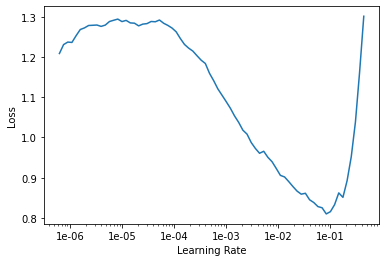

In [77]:
learnbc642.recorder.plot()

In [78]:
learnbc64.unfreeze()
learnbc64.fit_one_cycle(25, max_lr=slice(1e-04,1e-01))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.022963,0.429610,0.045593,0.954407,00:10
1,0.037942,0.491209,0.066869,0.933131,00:10
2,0.050767,1.066328,0.072948,0.927052,00:11
3,0.158338,1.998751,0.109422,0.890577,00:10
4,0.295714,1.091672,0.079027,0.920973,00:11
5,0.446515,4.452314,0.167173,0.832827,00:10
6,0.536894,1.997347,0.079027,0.920973,00:10
7,0.667302,14.589801,0.197568,0.802432,00:10
8,0.761663,3.303668,0.082067,0.917933,00:10
9,0.782553,2.336038,0.094225,0.905775,00:10


In [79]:
#learnbc642.save('vgg16-0.96')


In [80]:
learnbc642.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


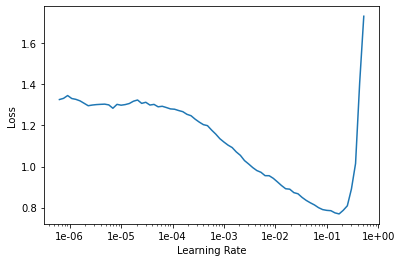

In [81]:
learnbc642.recorder.plot()

In [82]:
learnbc642.unfreeze()
learnbc642.fit_one_cycle(25, max_lr=slice(1e-04,1e-01))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.591872,0.328304,0.109422,0.890577,00:10
1,0.393821,0.685956,0.176292,0.823708,00:10
2,0.298868,0.575258,0.103343,0.896657,00:10
3,0.299905,1.029451,0.115502,0.884498,00:10
4,0.340129,1.395251,0.185410,0.814590,00:10
5,0.378653,1.092387,0.145897,0.854103,00:10
6,0.523485,2.976713,0.121581,0.878419,00:11
7,0.448297,1.455759,0.085106,0.914894,00:10
8,0.429023,1.034255,0.091185,0.908815,00:10
9,0.384228,0.402552,0.075988,0.924012,00:10


In [83]:
predictions, *_ = learnbc642.get_preds(ds_type=DatasetType.Test)
preds = np.argmax(predictions, 1)
preds
pred_arr5=a = np.array(preds)
len(pred_arr5)


706

This is the result with max test accuracy

In [84]:
test['emergency_or_not'] = pred_arr5
test.to_csv('/content/gdrive/My Drive/CV_Hack8.csv')

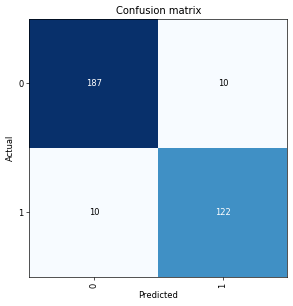

In [85]:
interp2 = ClassificationInterpretation.from_learner(learnbc642)

interp2.plot_confusion_matrix(figsize=(5,5), dpi=60)


In [86]:
learnbc642.unfreeze()
learnbc642.fit_one_cycle(50, max_lr=slice(1e-04,1e-01))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.020926,0.307097,0.066869,0.933131,00:10
1,0.012689,0.315526,0.066869,0.933131,00:10
2,0.014925,0.428421,0.066869,0.933131,00:10
3,0.022718,0.311519,0.060790,0.939210,00:10
4,0.027138,0.385245,0.094225,0.905775,00:10
5,0.069133,0.429381,0.075988,0.924012,00:10
6,0.097454,1.405082,0.139818,0.860182,00:10
7,0.151036,3.791073,0.215805,0.784195,00:10
8,0.162671,0.539670,0.069909,0.930091,00:10
9,0.143852,1.103812,0.091185,0.908815,00:10


In [87]:
#learnbc642.save('vgg-16-test0.958')